In [299]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [300]:
img = cv2.imread('rov_pool.jpg')

In [301]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1, # 1
                np.pi/180, # np.pi/180
                1, # 100
                minLineLength=10, # 100
                maxLineGap=10, # 10
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

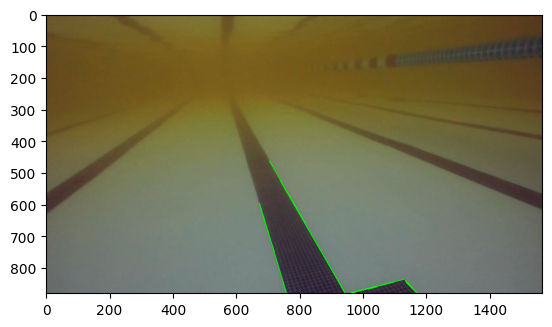

In [302]:
plt.imshow(img)

In [303]:
# img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [304]:
# at_detector = Detector(families='tag36h11',
#                        nthreads=1, # 1
#                        quad_decimate=1.0, # 1.0
#                        quad_sigma=0.0, # 0.0
#                        refine_edges=1, # 1
#                        decode_sharpening=0.25, # 0.25
#                        debug=0) # 0

In [305]:
# tags = at_detector.detect(img, 
#                           estimate_tag_pose=False, 
#                           camera_params=None, 
#                           tag_size=None)

In [306]:
# color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [307]:
# for tag in tags:
#     for idx in range(len(tag.corners)):
#         cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), 
#                  tuple(tag.corners[idx, :].astype(int)), 
#                  (0, 255, 0))

#     cv2.putText(color_img, str(tag.tag_id),
#                 org=(tag.corners[0, 0].astype(int) + 10, 
#                      tag.corners[0, 1].astype(int) + 10),
#                 fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#                 fontScale=0.8,
#                 color=(0, 0, 255))

In [308]:
# plt.imshow(color_img)